<div class="markdown-google-sans">

## **LAB 3**
</div>

<div class="markdown-google-sans">

<u>**1 Histogram equalization**</u>
</div>

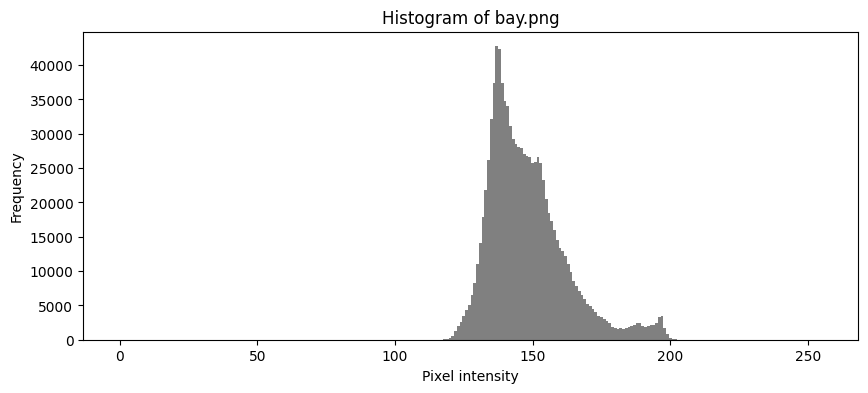

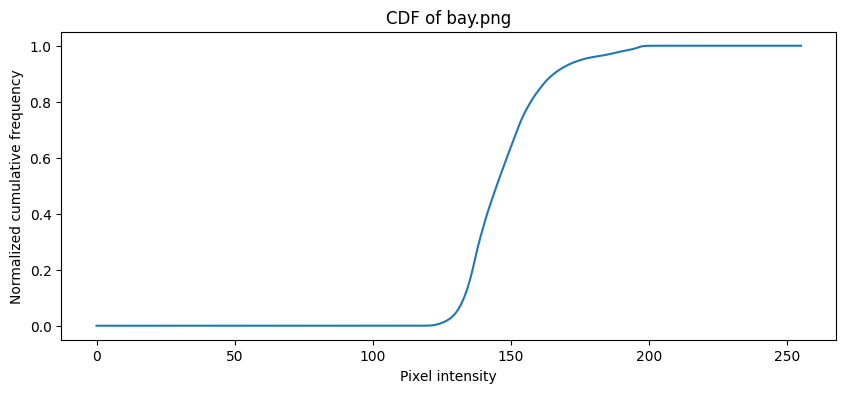

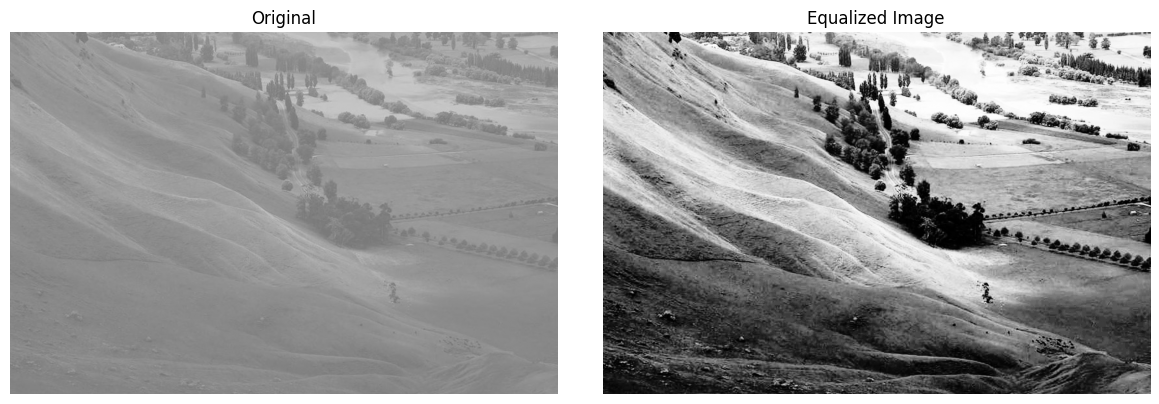

In [ ]:
# Useful code snippet:
# read an image as gray-scale image
import cv2 
import numpy as np  
import matplotlib.pyplot as plt
img = cv2.imread('./bay.png', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError('Could not load ./bay.png')

# compute image histogram
hist, bins = np.histogram(img.flatten(), 256, [0, 256])

plt.figure(figsize=(10, 4))
plt.bar(range(256), hist, width=1.0, color='gray')
plt.title('Histogram of bay.png')
plt.xlabel('Pixel intensity')
plt.ylabel('Frequency')

# compute cumulative density function
cdf = hist.cumsum()
# normalize cdf
cdf_normalized = cdf / cdf.max()

# histogram equalization using CDF
cdf_masked = np.ma.masked_equal(cdf, 0)
cdf_scaled = (cdf_masked - cdf_masked.min()) * 255 / (cdf_masked.max() - cdf_masked.min())
cdf_scaled = np.ma.filled(cdf_scaled, 0).astype(np.uint8)

eq_img = cdf_scaled[img]

plt.figure(figsize=(10, 4))
plt.plot(cdf_normalized)
plt.xlabel('Pixel intensity')
plt.ylabel('Normalized cumulative frequency')
plt.title('CDF of bay.png')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(eq_img, cmap='gray', vmin=0, vmax=255)
plt.title('Equalized Image')
plt.axis('off')

plt.tight_layout()
plt.show()


<div class="markdown-google-sans">

<u>**2 Image denoising**</u>
</div>

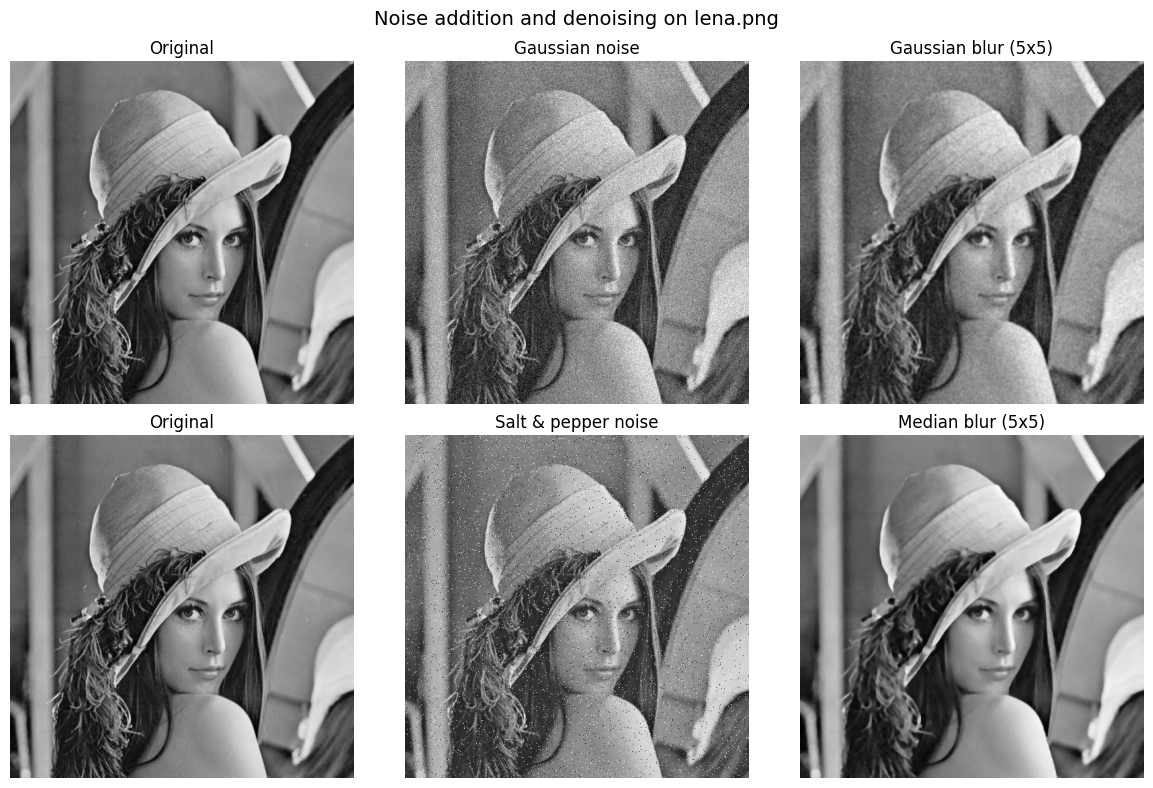

In [32]:
# convert a color image to gray-scale image

img = cv2.imread("./lena.png")
if img is None:
    raise FileNotFoundError("Could not load ./lena.png")

lena_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


def add_gaussian_noise(
    image: np.ndarray,
    mean: float = 0.0,
    std: float = 15.0,
    rng: np.random.Generator | None = None,
) -> np.ndarray:
    """Add Gaussian noise to a grayscale image."""
    if rng is None:
        rng = np.random.default_rng()
    noise = rng.normal(mean, std, size=image.shape)
    noisy = image.astype(np.float32) + noise
    return np.clip(noisy, 0, 255).astype(np.uint8)


def add_salt_pepper_noise(
    image: np.ndarray,
    amount: float = 0.04,
    salt_vs_pepper: float = 0.5,
    rng: np.random.Generator | None = None,
) -> np.ndarray:
    """Add Salt & Pepper noise to a grayscale image."""
    if rng is None:
        rng = np.random.default_rng()

    noisy = image.copy()
    total_pixels = image.size
    num_salt = int(total_pixels * amount * salt_vs_pepper)
    num_pepper = int(total_pixels * amount * (1.0 - salt_vs_pepper))

    salt_coords = (
        rng.integers(0, image.shape[0], num_salt),
        rng.integers(0, image.shape[1], num_salt),
    )
    pepper_coords = (
        rng.integers(0, image.shape[0], num_pepper),
        rng.integers(0, image.shape[1], num_pepper),
    )

    noisy[salt_coords] = 255
    noisy[pepper_coords] = 0
    return noisy


rng = np.random.default_rng(42)

gaussian_noisy = add_gaussian_noise(lena_gray, std=20.0, rng=rng)
# Gaussian noise denoised with Gaussian blur
# 5x5 kernel keeps parity with other operations
gaussian_denoised = cv2.GaussianBlur(gaussian_noisy, (5, 5), sigmaX=0)

salt_pepper_noisy = add_salt_pepper_noise(lena_gray, amount=0.03, salt_vs_pepper=0.6, rng=rng)
# Salt & pepper noise denoised with median blur (distinct method)
salt_pepper_denoised = cv2.medianBlur(salt_pepper_noisy, 5)

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle("Noise addition and denoising on lena.png", fontsize=14)

images = [
    (lena_gray, "Original"),
    (gaussian_noisy, "Gaussian noise"),
    (gaussian_denoised, "Gaussian blur (5x5)"),
    (lena_gray, "Original"),
    (salt_pepper_noisy, "Salt & pepper noise"),
    (salt_pepper_denoised, "Median blur (5x5)"),
]

for ax, (image, title) in zip(axes.flat, images):
    ax.imshow(image, cmap="gray")
    ax.set_title(title)
    ax.axis("off")

plt.tight_layout()
plt.show()


<div class="markdown-google-sans">

<u>**3 Image gradient**</u>
</div>

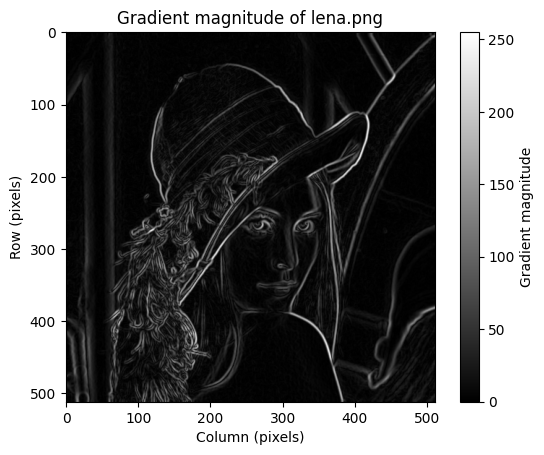

In [33]:
# convert image to gray-scale image
img = cv2.imread("./lena.png")
lena_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# compute gradient
gx = cv2.Sobel(lena_gray, cv2.CV_64F, 1, 0, ksize=5)
gy = cv2.Sobel(lena_gray, cv2.CV_64F, 0, 1, ksize=5)

magnitude = cv2.magnitude(gx, gy)

magnitude_norm = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
magnitude_uint8 = magnitude_norm.astype(np.uint8)
# display the gradient
plt.imshow(magnitude_uint8, cmap="gray")
plt.title("Gradient magnitude of lena.png")
plt.xlabel("Column (pixels)")
plt.ylabel("Row (pixels)")
plt.colorbar(label="Gradient magnitude")
plt.show()
